Firstly,download the code in https://github.com/davidsandberg/facenet

And we will use LFW dataset to verify the model http://vis-www.cs.umass.edu/lfw/lfw.tgz

The LFW dataset has a total of 13,233 jpeg images belonging to 5,749 different people, of which 1,680 correspond to more than one image, each image is 250×250 in size, and the corresponding person's name is marked.
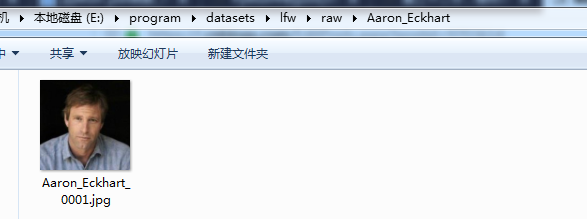

We need to calibrate the dataset used for detection to be the same size as the dataset used to train the model (160×160), and the converted dataset is stored in lfw_mtcnnpy_160 folder.

The first step in processing is face detection and alignment using an MTCNN network and scaling to 160×160.

The implementation of MTCNN is mainly in the folder facenet/src/align, and the contents of the folder are as follows:

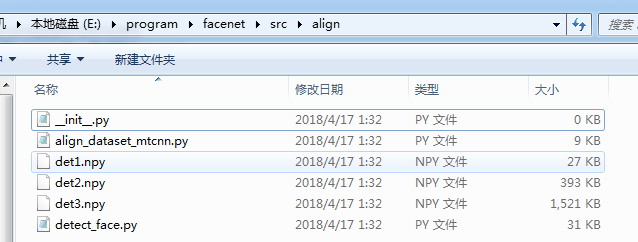

·detect_face.py: The model structure of MTCNN is defined, consisting of P-Net, R-Net, and O-Net, and these three networks have provided pre-trained models, and the model data corresponds to the files det1.npy, det2.npy, and det3.npy.

·align_dataset_matcnn.py: is the entry code for face detection and alignment using MTCNN's model.

We open Anaconda Prompt, go to the path where facenet is located, and run the following command:

In [ ]:
python  facenet/src/align/align_dataset_mtcnn.py   datasets/lfw/raw  datasets/lfw/lfw_mtcnnpy_160 --image_size 160 --margin 32 --random_order

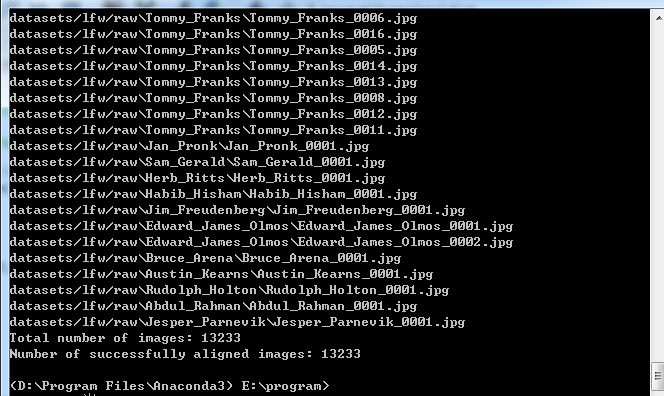

This command creates a folder of datasets/lfw/lfw_mtcnnpy_160 and stores all aligned face images in this folder, with the same structure as the original datasets/lfw/raw.

Now we need to use the Facenet models.Because the time to train a model in too long,so we can use Facenet pre-trained models.

The original authors of the project provide two pre-trained models, which are trained based on CASIA-WebFace and VGGFace2 face libraries, download at: https://github.com/davidsandberg/facenet:

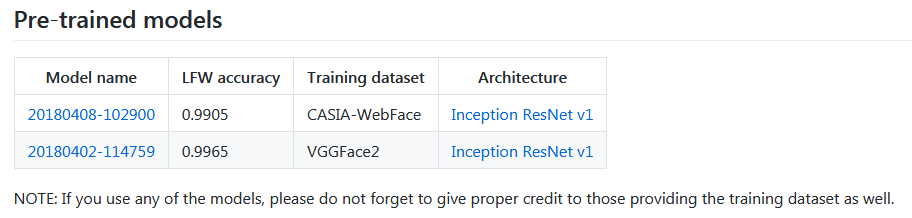

We open Anaconda Prompt, go to the facenet path, and run the following command:

In [ ]:
python src/validate_on_lfw.py  ../datasets/lfw/lfw_mtcnnpy_160 models/20180408-102900

The results are as follows：

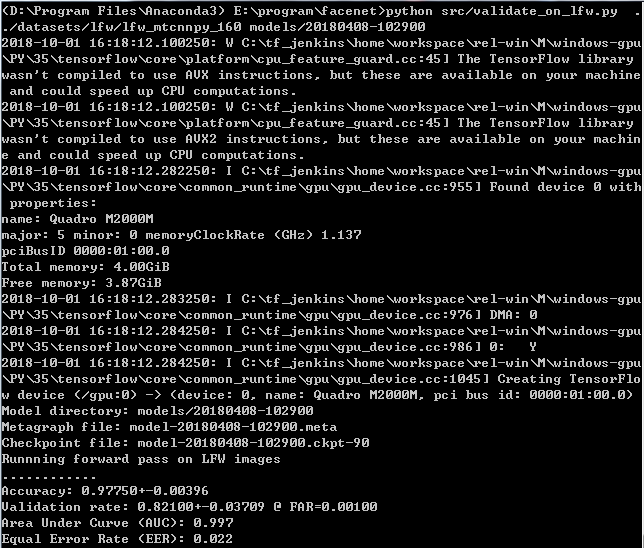

From this, we verify that the accuracy of the model on LFW is 99.7%.